<b>AUTHOR:KRITTIKA DUTTA</b>


<b>TSF TASK #6</b>

Create the Decision Tree classifier and visualize it graphically.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('Iris.csv')

In [22]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df.drop('Id',axis=1,inplace=True)

In [48]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
X = df.drop('Species',axis=1).values

In [52]:
y = df['Species'].values
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
from sklearn.tree import DecisionTreeClassifier


In [55]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
y_pred = dtree.predict(X_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [59]:
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_pred.head()

,Actual,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor


In [60]:

print(confusion_matrix(y_test,y_pred))


[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


<b>WE NEED AN UNKNOWN DATA TO THE CLASSIFIER</b>

In [61]:
X_new = [[5.0,4.0,1.0,0.1]]
dtree.predict(X_new)

array(['Iris-setosa'], dtype=object)

In [62]:
X_new = [[6.0,5.0,4.0,2.5]]
dtree.predict(X_new)

array(['Iris-versicolor'], dtype=object)

In [63]:
features = list(data.columns[:4])
features

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']

<b>DECISION TREE VISUALIZATION</b>

In [64]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"




VISUALIZING

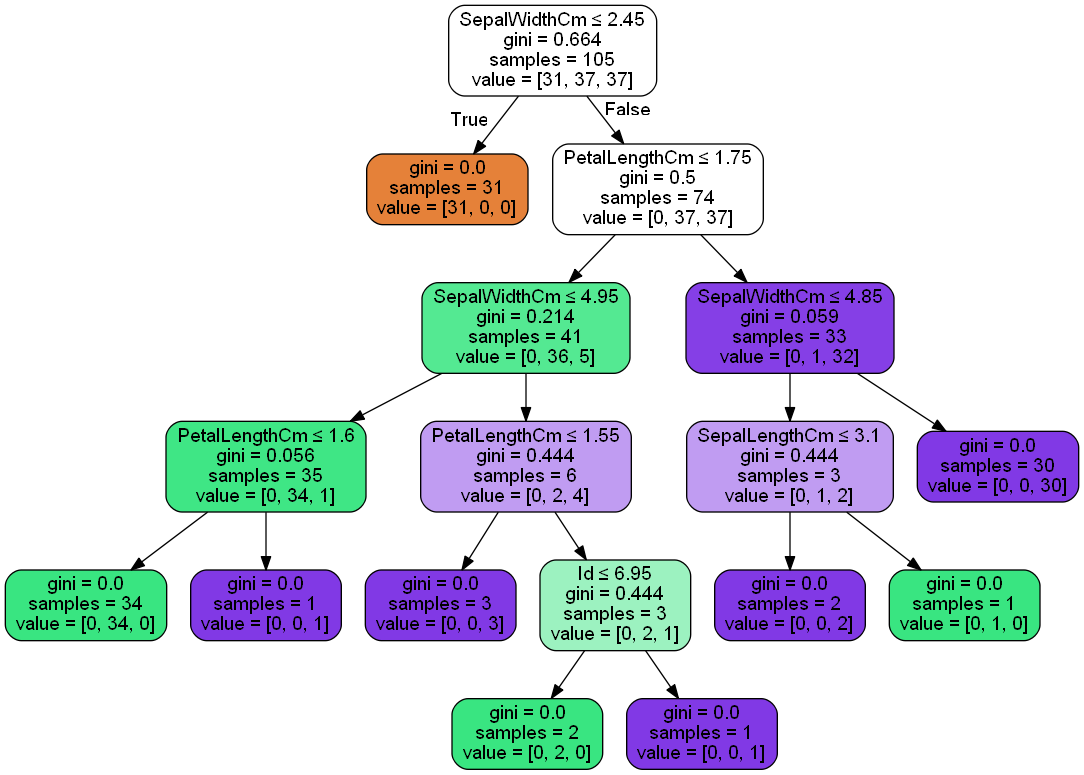

In [65]:

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
